In [363]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import math as math
import seaborn as sns
import numpy as np 
from datetime import datetime
from sklearn.model_selection import train_test_split


[9500000.0, 12300000.0, 11000000.0, 24000000.0, 157200000.0, 13000000.0, 8800000.0] [datetime.date(2015, 10, 5), datetime.date(2016, 9, 12), datetime.date(2018, 4, 22), datetime.date(2018, 5, 14), datetime.date(2018, 9, 5), datetime.date(2020, 3, 31), datetime.date(2020, 5, 11)]


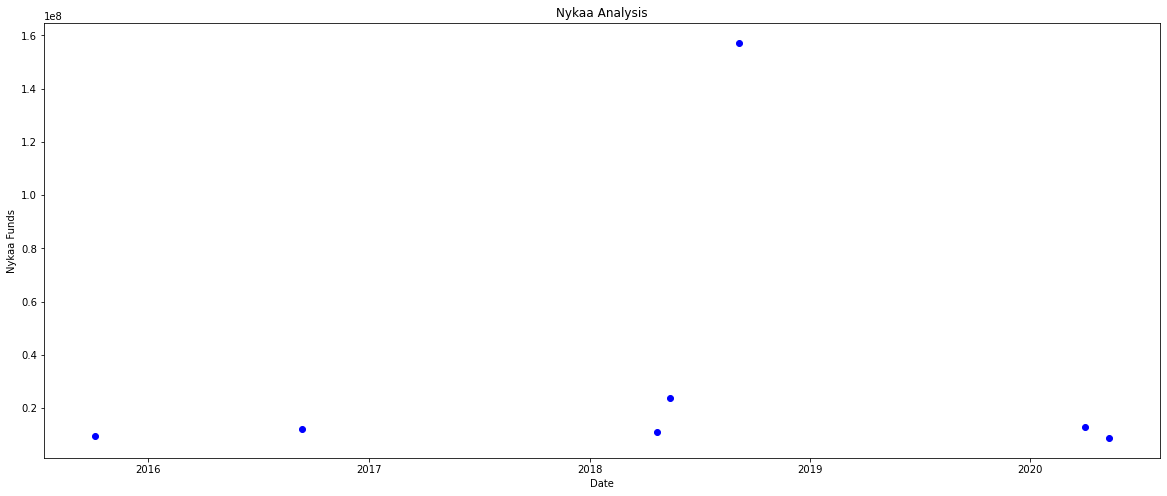

Thsi is  [datetime.date(2018, 5, 14), datetime.date(2015, 10, 5), datetime.date(2016, 9, 12), datetime.date(2020, 3, 31), datetime.date(2018, 4, 22)] [datetime.date(2018, 9, 5), datetime.date(2020, 5, 11)] [24000000.0, 9500000.0, 12300000.0, 13000000.0, 11000000.0] [157200000.0, 8800000.0]


In [364]:
x1=cdf1['Date (dd/mm/yyyy)'].values
y1=cdf1['Amount (In USD)'].values
x=cdf['Date dd/mm/yyyy'].values
y=cdf['Amount in USD'].values

global X_train, X_test, y_train, y_test
amount=''
z=[]
x2=[]
date=''
for i in y:
    if i=="undisclosed":
        continue
    for j in i:
        if j==",":
            continue
        else:
            amount=amount+j
    i=float(amount)
    z.append(i)

    amount=''
z.reverse()
y3=[]
for i in y1:
    y3.append(i)
y3.reverse()
for i in y3:
    if i=="undisclosed":
        continue
    for j in i:
        if j==",":
            continue
        else:
            amount=amount+j
    i=float(amount)
    z.append(i)
    amount=''

for i in x:
    for j in i:
        if j=='/':
            date=date+'-'
        else:
            date=date+j
    x2.append(date)
    date=''
x2.reverse()

k=0
n=0
b=0
x3=[]
for i in x1:
    x3.append(i)
x3.reverse()
for i in x3:
    for j in i:
        if j=='/':
            date=date+'-'
        else:
            date=date+j
    x2.append(date)
    date=''
date1=[]

for i in x2:
    i=datetime.strptime(i, '%d-%m-%Y').date()
    date1.append(i)   
m=date1    
for i in date1:
    for j in m:
        if b==n:
            b=b+1
            continue
        if i==j:
            z.pop(b)
            date1.pop(b)
            b=b+1
        b=b+1 

    n=n+1
    b=0
print(z,date1)

plt.figure(figsize=(20,8))

plt.scatter(date1,z,color="blue")
plt.xlabel('Date')
plt.ylabel('Nykaa Funds')
plt.title('Nykaa Analysis')
plt.show()
X_train, X_test, y_train, y_test = train_test_split(date1, z, test_size=0.2, random_state=4)
print("Thsi is ",X_train, X_test, y_train, y_test)

In [320]:

df=pd.read_csv('startup_funding.csv')
df= df[df['Amount in USD'].notna()]
cdf=df.loc[df['Startup Name']=="Nykaa"]
cdf=pd.DataFrame(cdf)
cdf.to_csv('Vedantu.csv')


df=pd.read_csv('merge.csv')
df= df[df['Amount (In USD)'].notna()]
cdf1=df.loc[df['Startup Name']=="Nykaa"]
cdf1=pd.DataFrame(cdf1)
cdf1.to_csv('Vedantu1.csv')





[[736828]
 [735876]
 [736219]
 [737515]
 [736806]]
[[ 0.00000000e+00  1.02994236e-05  8.58693459e+00 -7.76897130e-06]]
this [-1.55409974e+12]


In [365]:
x3=[]
for i in X_train:
    dt=datetime(i.year,i.month,i.day)
    x3.append(dt.toordinal())
print(x3)   

[736828, 735876, 736219, 737515, 736806]


In [366]:
X_train=np.asanyarray(x3)
X_train=X_train.reshape(5,1)
print(X_train)
y_train=np.asanyarray(y_train)
y_train=y_train.reshape(1,-1)
y_train=y_train.reshape(5,1)
from sklearn import linear_model
poly = PolynomialFeatures(degree=3)
regr=linear_model.LinearRegression()
train_y=regr.fit(X_train,y_train)
print(regr.coef_)
print("this",regr.intercept_)


[[736828]
 [735876]
 [736219]
 [737515]
 [736806]]
[[2934.07207766]]
this [-2.14742068e+09]


In [367]:
x3=[]
for i in X_test:
    dt=datetime(i.year,i.month,i.day)
    x3.append(dt.toordinal())
print(x3)    

[736942, 737556]


In [368]:
X_test=np.asanyarray(x3)
print(X_test)
X_test=X_test.reshape(2,1)
print(X_test)
y_hat = regr.predict(X_test)
print("This",y_hat)
print(y_test)

[736942 737556]
[[736942]
 [737556]]
This [[14820269.9331708 ]
 [16621790.18885708]]
[157200000.0, 8800000.0]


[[736828]
 [735876]
 [736219]
 [737515]
 [736806]]
[[1.00000000e+00 7.36828000e+05 5.42915502e+11 4.00035343e+17]
 [1.00000000e+00 7.35876000e+05 5.41513487e+11 3.98486779e+17]
 [1.00000000e+00 7.36219000e+05 5.42018416e+11 3.99044256e+17]
 [1.00000000e+00 7.37515000e+05 5.43928375e+11 4.01155336e+17]
 [1.00000000e+00 7.36806000e+05 5.42883082e+11 3.99999512e+17]]


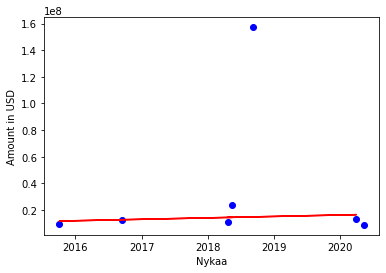

In [369]:
print(X_train)
print(train_x_poly)
plt.scatter(date1,z,color="blue")
yy = regr.intercept_[0]+ regr.coef_[0][0]*X_train
plt.plot(X_train, yy, '-r' )
plt.xlabel("Nykaa")
plt.ylabel("Amount in USD")
plt.show()

[datetime.date(2017, 5, 30), datetime.date(2015, 6, 9), datetime.date(2020, 4, 6), datetime.date(2015, 4, 3), datetime.date(2015, 5, 6), datetime.date(2016, 9, 19), datetime.date(2018, 2, 7)] [datetime.date(2016, 1, 19), datetime.date(2016, 5, 10)]


In [370]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , y_test) )

Mean absolute error: 74200000.00
Residual sum of squares (MSE): 10032911164858902.00
R2-score: -12529.16


In [371]:
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    print(y)
    return y

In [372]:
x_data=X_train/max(X_train)
y_data=y_train/max(y_train)
x_data=np.asanyarray(x_data).reshape(1,5)
y_data=np.asanyarray(y_data).reshape(1,5)
print(x_data,y_data)

[[0.99906849 0.99777767 0.99824275 1.         0.99903866]] [[1.         0.39583333 0.5125     0.54166667 0.45833333]]


In [373]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, x_data, y_data)
#print the final parameters
print(popt[0],popt[1])
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

[[0.49976712 0.49944442 0.49956069 0.5        0.49975967]]


TypeError: Improper input: N=2 must not exceed M=1